In [17]:
import numpy as np


class AdalineSGD(object):
  eta : float
  n_iter : int
  shuffle : bool # тасовать данные или нет
  random_state : int

  w_: np.array
  cost_ : list # список значений функции ошибок
  
  def __init__(self, eta=0.01, n_iter=50, shuffle=True, random_state=1):
    self.eta = eta
    self.n_iter = n_iter
    self.shuffle = shuffle
    self.random_state = random_state
    
  def fit(self, X, y):
    self._initialize_weights(X.shape[1])
    self.cost_ = []
    for i in range(self.n_iter):
      if self.shuffle:
        X, y = self._shuffle(X, y)
      cost = []
      for xi, target in zip(X, y):
        cost.append(self._update_weights(xi, target))
      avg_cost = sum(cost) / len(y)
      self.cost_.append(avg_cost)
    return self
  
  def partial_fit(self, X, y):
    if not self.w_initialized:
      self._initialize_weights(X.shape[1])
    if y.ravel().shape[0] > 1: # вычисляет число элементов в массиве(многомерном в том числе) и если элементов 2 и больше(1 для обучения и один для проверки), то обучает модель
      for xi, target in zip(X, y):
        self._update_weights(xi, target)
    else: # если бы не было проверки, то 1 образец данных можно было бы только потренить, но не проверить, а если было бы 0 образцов, то zip выкинул бы ошибку
      self._update_weights(X, y)
    return self
  
  def _shuffle(self, X, y):
    r = self.rgen.permutation(len(y)) # создаём шафл индексов для конкретно этой модели
    return X[r], y[r]

  def _initialize_weights(self, m):
      self.rgen = np.random.RandomState(self.random_state) # создаём генератор случайных чисел
      self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1 + m)
      self.w_initialized = True

  def _update_weights(self, xi, target): # обновляем веса после одного образца
    output = self.activation(self.net_input(xi))
    error = (target - output)
    self.w_[1:] += self.eta * xi.dot(error)
    self.w_[0] += self.eta * error
    cost = 0.5 * error ** 2
    return cost
  
  def net_input(self, X):
    return np.dot(X, self.w_[1:]) + self.w_[0]
  
  def activation(self, X):
    return X

  def predict(self, X):
    return np.where(self.net_input(self.activation(X)) >= 0.0, 1, -1)
  
  def score(self, X, y):
    return str(sum(y == self.predict(X)) / len(y) * 100) + "%"

In [18]:
import pandas as pd
import os
from sklearn import datasets
from IPython.display import display


data = datasets.load_iris() # setosa, versicolor, virginica
dataset = pd.DataFrame(data.data, columns=data.feature_names).iloc[:100, [0, 2]].values
y = np.array([1] * 50 + [-1] * 50)

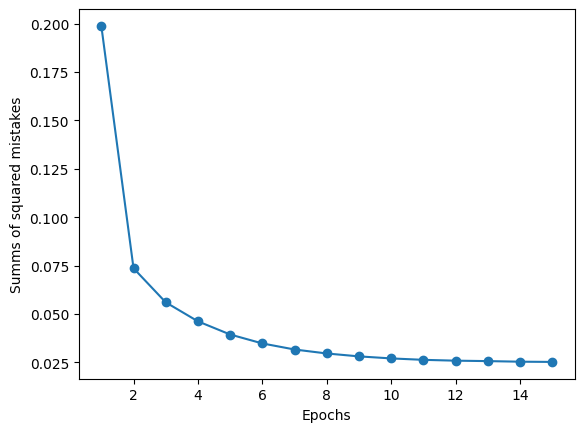

In [19]:
import matplotlib.pyplot as plt

std_dataset = dataset.copy()

std_dataset[:, 0] = (dataset[:, 0] - np.mean(dataset[:, 0])) / np.std(dataset[:, 0])
std_dataset[:, 1] = (dataset[:, 1] - np.mean(dataset[:, 1])) / np.std(dataset[:, 1])

updated_ada_sgd = AdalineSGD(n_iter=15)
updated_ada_sgd.fit(std_dataset, y)
plt.plot(range(1, len(updated_ada_sgd.cost_) + 1), updated_ada_sgd.cost_, marker="o")
plt.xlabel("Epochs")
plt.ylabel("Summs of squared mistakes")
plt.show()